In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter

import seaborn as sns
sns.set_theme(style = "darkgrid")
import matplotlib.pyplot as plt

In [12]:
diseases = pd.read_csv(r"C:\Users\ptere\Downloads\Symptom2Disease.csv")
diseases['text'] = diseases['text'].str.strip().str.lower()
diseases['label'] = diseases['label'].str.strip().str.lower()



print(f"No. Duplicated Rows: {diseases.duplicated().sum()}")
print(f"No. Missing Values:\n{diseases.isna().sum()}")


diseases = diseases.drop(columns = ["Unnamed: 0"])

diseases.head()


No. Duplicated Rows: 0
No. Missing Values:
Unnamed: 0    0
label         0
text          0
dtype: int64


,label,text
0,psoriasis,i have been experiencing a skin rash on my arm...
1,psoriasis,"my skin has been peeling, especially on my kne..."
2,psoriasis,i have been experiencing joint pain in my fing...
3,psoriasis,"there is a silver like dusting on my skin, esp..."
4,psoriasis,"my nails have small dents or pits in them, and..."


In [13]:
x = diseases['text'].values  # Only use the text column
y = diseases['label'].values

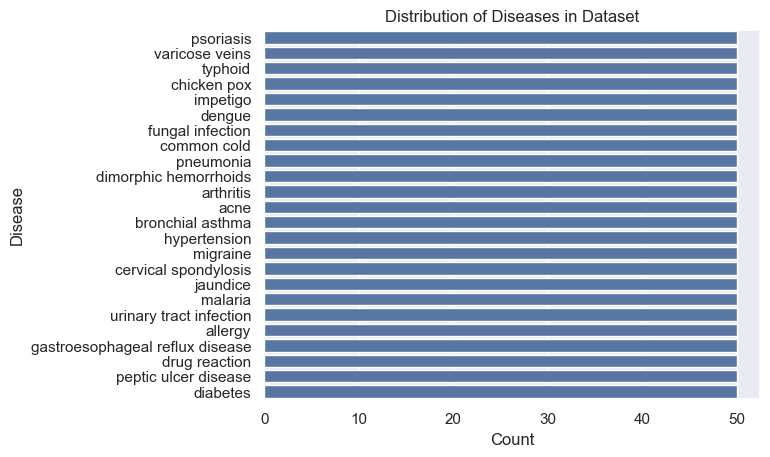

In [14]:
sns.countplot(y = y, order = pd.Series(y).value_counts().index)
plt.title("Distribution of Diseases in Dataset")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show() 

In [24]:
vectorizer = TfidfVectorizer(

    lowercase = True,
    ngram_range = (1, 2),
    max_features = 20000,
    min_df = 2,
    token_pattern = r"(?u)\b[\w-]{2,}\b"
)

X_vect = vectorizer.fit_transform(x)
print(f"Feature names shape: {vectorizer.get_feature_names_out().shape}")

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Only need fit_transform, not separate fit

print("Disease classes:", le.classes_)
print("Encoded labels:", y_encoded)

num_classes = len(le.classes_)
print(f"Numbers of diseases identified: {num_classes}")

# Correct variable assignment order: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Feature names shape: (5165,)
Disease classes: ['acne' 'allergy' 'arthritis' 'bronchial asthma' 'cervical spondylosis'
 'chicken pox' 'common cold' 'dengue' 'diabetes' 'dimorphic hemorrhoids'
 'drug reaction' 'fungal infection' 'gastroesophageal reflux disease'
 'hypertension' 'impetigo' 'jaundice' 'malaria' 'migraine'
 'peptic ulcer disease' 'pneumonia' 'psoriasis' 'typhoid'
 'urinary tract infection' 'varicose veins']
Encoded labels: [20 20 20 ...  8  8  8]
Numbers of diseases identified: 24
Training set shape: (960, 5165)
Test set shape: (240, 5165)
Training labels shape: (960,)
Test labels shape: (240,)
